# Lunita's Team:

* Cano Jeorval
* Cuevas Danilo
* Erosa Jorge
* Hernandez Andrés
* Robles Jack

# NB5. Information Cascades

## 1. Network Simulation

A. Simulate a Random Network with N = 50 and p = 5%. Make a visualization of the graph. Make sure your network is connected.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import gif
import random

In [2]:

i = 0
while True:
    random_model = nx.generators.random_graphs.erdos_renyi_graph(n = 50, p = .05, seed = i)
    
    if nx.algorithms.components.is_connected(random_model):
        print(i)
        break
    i += 1

6


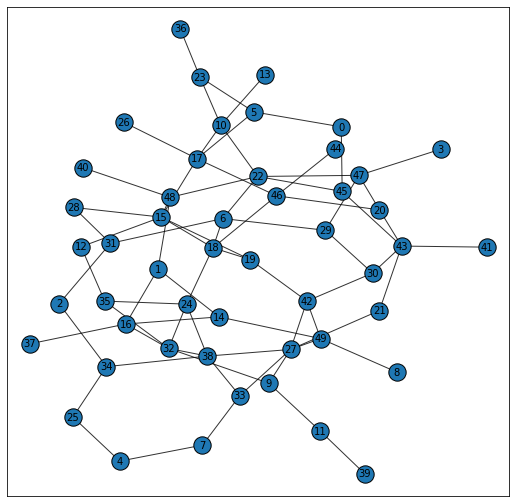

In [3]:
# Network Visualization
plt.figure(figsize=(9, 9))
pos = nx.kamada_kawai_layout(random_model)
nx.draw_networkx_nodes(random_model, pos, node_size=300, edgecolors = 'black')
nx.draw_networkx_edges(random_model, pos, alpha=0.8)
nx.draw_networkx_labels(random_model,pos = pos, font_size = 10)
plt.show()

## 2. Fractional Threshold Model
1. Implement an algorithm to simulate the information spread using the fractional threshold model. Consider a synchronous implementation.
2. Complete the following considering a copy of the network at the section 1:
    
    a) Initialize as 'Active' a random sample with 10% of the total network. The rest of the network will be initialized as 'Inactive'.
    
    b) How much nodes are vulnerable nodes?
    
    c) Simulate the information spread with $\theta = \frac{1}{2}$ until no further nodes can be activate. Plot the proportion of nodes in each state ('Active' and 'Inactive') at each step of the simulation.
    
    d) Create an animation (GIF Image) showing the state of the graph at each step.  
    

In [4]:
G_copy = random_model.copy()

In [5]:
def initial_state(G, p_nodes = .1):
    """
    Function to initialize a percentage of nodes into actives and the remaining into inactives
    
    input:
    G: A graph
    p_nodes: percentage of nodes that are going to be random activated
    
    output:
    return a dictinoary with the names of the nodes and whether is active or inactive
    """
    state = {}
    for node in G.nodes:
        state[node] = 'Inactive'
     
    #get the random nodes to be activated
    active_nodes = np.random.choice(list(G.nodes), size = round(p_nodes * G.number_of_nodes()), replace = False)
    
    for node in active_nodes:
        state[node] = 'Active'
    
    return state


def getVulnerableNodes(G, treshold):
    """
    Function to obtain the vulnerable nodes given a treshold
    
    input:
    G: Graph
    treshold: it is theta in the formula
    
    output:
    return a list of vulnerable nodes
    """
    vulnerable_nodes = [] 
    
    for node in G.nodes:
        if G.degree[node] <= 1/treshold:
            vulnerable_nodes.append(node)
            
    return vulnerable_nodes

@gif.frame
def plot_G(G, pos, nodes_state, t):
    """
    Function to get a frame for the gif
    
    input:
    G: Graph
    pos: it is layer for plotting the graph
    nodes_state: dictionary containing whether a graph is activated or inactivated
    """
    
    node_colors = ['orange' if nodes_state[node] == 'Active' else 'lightblue' for node in nodes_state]
    
    s = 150
    
    fig, ax = plt.subplots(figsize = (9, 9), dpi = 50)
    nx.draw_networkx_nodes(G, pos = pos, nodelist = G.nodes(), node_color = node_colors, node_size = s, ax = ax)    
    nx.draw_networkx_edges(G, pos = pos, edgelist = G.edges(), ax = ax)
    nx.draw_networkx_labels(G, pos = pos, ax = ax)
    
    ax.set_title("Iteration %s" % t)

def TresholdModel(G, pos, treshold = 1/2, p_nodes = .1, gif = True):
    """
    Function that simulates the treshold model for information spreading
    
    input:
    G: Graph
    pos: it is layer for plotting the graph
    treshold: float, it is used to know if a node gets active or nor
    p_nodes: float, percentage of nodes that are going to be activated randomly
    gif: boolean to return or not the frame
    
    output:
    return the vulnerable_nodes and the frames
    """
    
    if gif:
        frames = []
    
    #getting vulnerable nodes
    vulnerable_nodes = getVulnerableNodes(G, treshold)
    
    #initializing nodes
    nodes_state = initial_state(G, p_nodes = p_nodes)
    
    #frame of the first activated nodes
    if gif:
        frames.append(plot_G(G, pos, nodes_state, 0))
        
    idx = 0
    while True:
        
        #dictionary used to then compare if the nodes_state dictionary has a change after an iteration
        memory_states = nodes_state.copy()
        
        #dictionary to save the new activate nodes
        new_active_nodes = dict()
        
        for node in G.nodes:
            
            #case when the node is already active
            if nodes_state[node] == 'Active':
                continue

            else:
                
                
                counter = 0
                for neighbor_node in G.neighbors(node):

                    #counting the neighbors that are active
                    if nodes_state[neighbor_node] == 'Active':
                        counter += 1

                    #checking if the current node meet the requierement to get active
                    if counter/G.degree[node] >= treshold:
                        new_active_nodes[node] = 'Active'
                        break

        #updating the new active nodes
        nodes_state.update(new_active_nodes)
        
        #if there was no change in the nodes after an iteration, there is not going to be more changes if we keep iterating, so we break
        #the loop
        if memory_states == nodes_state:
            break
        
        idx += 1
        if gif:
            frames.append(plot_G(G, pos, nodes_state, idx))
            
            
    
    if gif:
        return vulnerable_nodes, frames
        
    return vulnerable_nodes

In [6]:
vul, frames = TresholdModel(G_copy, pos = pos)

In [7]:
vul

[0, 2, 3, 4, 7, 8, 11, 12, 13, 21, 25, 26, 28, 36, 37, 39, 40, 41, 44]

In [8]:
gif.save(frames, "Images/TresholdModel.gif", duration = len(frames), unit = "s", between='startend')

![](Images/TresholdModel.gif)

## Example using a low treshold 

In [9]:
vul, frames = TresholdModel(G_copy, pos = pos, treshold = .1)

In [10]:
print(vul)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [11]:
gif.save(frames, "Images/TresholdModel_2.gif", duration = len(frames), unit = "s", between='startend')

![](Images/TresholdModel_2.gif)

## 3. Independent Cascade Model

1. Implement an algorithm to simulate the information spread using the a independent cascade model.
2. Complete the following considering a copy of the network at the section 1:
    
    a) Initialize as 'Active' a random sample with 10% of the total network. The rest of the network will be initialized as 'Inactive'.
        
    b) Simulate the information until no further nodes can be activate. Consider that the probability $P_{v,w}$, i. e. probability that node w gets activated due to v, is given by a constant P = 0.5 for any node in the network. Plot the proportion of nodes in each state ('Active' and 'Inactive') at each step of the simulation.
    
    c) Create an animation (GIF Image) showing the state of the graph at each step. 

In [12]:
G_copy = random_model.copy()

In [13]:
def initial_state(G, p_nodes = .1):
    """
    Function to initialize a percentage of nodes into actives and the remaining into inactives
    
    input:
    G: A graph
    p_nodes: percentage of nodes that are going to be random activated
    
    output:
    return a dictinoary with the names of the nodes and whether is active or inactive
    """
    state = {}
    for node in G.nodes:
        state[node] = 'Inactive'
     
    active_nodes = np.random.choice(list(G.nodes), size = round(p_nodes * G.number_of_nodes()), replace = False)
    
    for node in active_nodes:
        state[node] = 'Active'
    
    return state

def IndependentCascadeModel(G, pos, p = .5, p_nodes = .1, gif = True):
    """
    Function that simulates information speed using the independent cascade model
    
    input:
    G: Graph
    pos: it is layer for plotting the graph
    p: float, it is used to know if a node gets active or nor
    p_nodes: float, percentage of nodes that are going to be activated randomly
    gif: boolean to return or not the frame
    
    output:
    return the frames
    """
    frames = []
    
    #generating the random nodes between 0 and 1
    edges_weights = {edge: random.random() for edge in G.edges}
    
    #getting new keys when is a undirected grap
    if not(G.is_directed()):
        for edge in edges_weights.copy():

            edges_weights[(edge[1], edge[0])] = edges_weights[edge]
    
    #intialzing the random activated nodes
    nodes_state = initial_state(G, p_nodes = p_nodes)
    
    #getting a list of the names of the active nodes, it is a list used as a stack to use in the algorithm
    active_nodes = [node for node in nodes_state if nodes_state[node] == 'Active']
    
    if gif:
        frames.append(plot_G(G, pos, nodes_state, 0))
    
    idx = 1
    while len(active_nodes) > 0:
        #dictionary to save the new active nodes
        new_active_nodes = dict()
        
        current_node = active_nodes.pop(0)
        
        #iterating over each neighbor
        for neighbors_node in G.neighbors(current_node):
            
            if nodes_state[neighbors_node] == 'Active':
                continue
            
            #checking if the generated number is less than p   
            if edges_weights[(current_node, neighbors_node)] < p:

                new_active_nodes[neighbors_node] = 'Active'
        
        #updating the state of the nodes
        nodes_state.update(new_active_nodes)
        
        #updating new activate nodes
        active_nodes.extend(list(new_active_nodes.keys()))
        
        idx += 1
        if gif:
            frames.append(plot_G(G, pos, nodes_state, idx))
            
    return frames

In [14]:
frames = IndependentCascadeModel(G_copy, pos)

In [15]:
gif.save(frames, "Images/IndependentCascadeModel.gif", duration = len(frames), unit = "s", between='startend')

![](Images/IndependentCascadeModel.gif)

## Example with a large p

In [16]:
frames = IndependentCascadeModel(G_copy, pos, p = .9)

In [17]:
gif.save(frames, "Images/IndependentCascadeModel_2.gif", duration = len(frames), unit = "s", between='startend')

![](Images/IndependentCascadeModel_2.gif)

## 4. Maximazing the Information Spread

1. Implement the algorithm to find the set S with size k that maximize the information spread based on the Greedy Algorithm proposed by Kempe (2003). 
2. Find the set S with size k = 10 that maximize the influence for each Network taking into account that the probability $P_{v,w}$, i. e. probability that node w gets activated due to v, is given by a constant P = 0.5 for any node in the network.

In [18]:
def NodesActivated(G, edges_weights, p):
    """
    Function that finds how for all the nodes in a graph how many can activate each one of them
    
    input: 
    G: Graph
    edges_weights: dictionary containing the random number generated for each edge
    p: float, it is used to know if a node gets active or nor
    
    output:
    return a dictionary of all the nodes activated when a node is activated at the beginning
    """
    activated_nodes = dict()

    for node in G.nodes:
    
        #list to save the activate nodes
        nodes_actives = []
        
        #list that is used as a queue for the while loop conditional
        nodes_actives_drop = [node]
        idx = 0 
        
        while len(nodes_actives_drop) > 0:
            
            current_node = nodes_actives_drop.pop(0)
            
            #looping through each neigborh of the node in the queue
            for neighbors_node in G.neighbors(current_node):

                if neighbors_node in nodes_actives:
                    continue

                if edges_weights[(current_node, neighbors_node)] < p:

                    #saving the new activated node
                    nodes_actives.append(neighbors_node)

                    nodes_actives_drop.append(neighbors_node)
                        
        #saving in the dictionary the nodes activated by a node
        activated_nodes[node] = nodes_actives
        
    return activated_nodes



def get_max(nodes_dict):
    """
    Function to get the node that activates the maximum number of the nodes
    
    input:
    nodes_dict: dictionary of all the nodes activated when a node is activated at the beginning
    
    output:
    node that activates the maximum number of nodes
    """
    #mapping to get the number of activates nodes
    len_list = list(map(lambda x: len(x), nodes_dict.values()))
    
    #getting the max number of activates nodes
    key = np.flip(np.argsort(len_list))[0]
    
    #obtaining the key
    key = list(nodes_dict.keys())[key]
    
    return key

def maximazing_set(G, nodes_set, activated_set, nodes_dict):
    """
    Function to get the node that activates the maximum number of the nodes when some nodes are aldeary activated
    
    input:
    G: Graph
    nodes_set: set of the nodes that are activated in each iteration due to k
    activated_set: set of all the activated nodes
    nodes_dict: dictionary of all the nodes activated when a node is activated at the beginning
    
    output:
    node that activates the maximum number of nodes
    """
    #to avoid selecting a node already in the set
    for node in nodes_set:
        nodes_dict.pop(node, None)
        
    #getting how many nodes each node can be connected to
    len_list = list(map(lambda x: len([value for value in x if value not in activated_set]), nodes_dict.values()))
    
    key = np.flip(np.argsort(len_list))[0]
    
    key = list(nodes_dict.keys())[key]
            
    return key


@gif.frame
def plot_G_max(G, pos, nodes_activators, nodes_activates, t):
    """
    Function to get a frame for the gif
    
    input:
    G: Graph
    pos: it is layer for plotting the graph
    nodes_activators: nodes that are activated randomly and not by other nodes
    nodes_activates: nodes that are activate

    return a frame
    """
    
    node_colors = []
    
    #getting the color of the nodes
    for node in G.nodes:
        
        if node in nodes_activators:
            node_colors.append('red')
            
        elif node in nodes_activates:
            node_colors.append('yellow')
            
        else:
            node_colors.append('lightblue')
    
    s = 150
    
    fig, ax = plt.subplots(figsize = (9, 9), dpi = 50)
    nx.draw_networkx_nodes(G, pos = pos, nodelist = G.nodes(), node_color = node_colors, node_size = s, ax = ax)    
    nx.draw_networkx_edges(G, pos = pos, edgelist = G.edges(), ax = ax)
    nx.draw_networkx_labels(G, pos = pos, ax = ax)
    
    ax.set_title("Iteration %s" % t)

def InformationSpreadModel(G, pos, k = 10,p = .5, gif = True):
    """
    Function to simulate the information spread using a greedy algorith
    
    input:
    G: Graph
    pos: layout to plot the graph
    k: number of nodes randomly select as maximum to maximize
    p: float, it is used to know if a node gets active or not
    
    return the frames for the gif
    """
    frames = []
    
    #generating the random nodes between 0 and 1
    edges_weights = {edge: random.random() for edge in G.edges}
    
    #getting new keys when is a undirected grap
    if not(G.is_directed()):
        for edge in edges_weights.copy():

            edges_weights[(edge[1], edge[0])] = edges_weights[edge]
      
    #getting the nodes activated when a node is selected
    nodes_activated_by_nodes = NodesActivated(G, edges_weights, p)
    
    #set to save activate nodes generated randomly to maximize
    S = list()
    
    #set of the activate node
    activated_nodes = set()
    
    #maximum number of activate nodes
    max_nodes = G.number_of_nodes()
    
    for i in range(1, k + 1):
        
        #conditional when all the nodes are activated
        if len(activated_nodes) == max_nodes:
            break
        
        #case when S is empty
        if i == 0:
            
            node_max = get_max(nodes_activated_by_nodes)
            
            S.append(node_max)
            
            activated_nodes.add(node_max)
            
            frames.append(plot_G_max(G, pos, S, activated_nodes, i))
            
            activated_nodes.update(nodes_activated_by_nodes[node_max])
            
        else:
            
            node_max = maximazing_set(G, S, activated_nodes, nodes_activated_by_nodes)
            
            S.append(node_max)
            
            activated_nodes.add(node_max)
            
            frames.append(plot_G_max(G, pos, S, activated_nodes, i))
            
            activated_nodes.update(nodes_activated_by_nodes[node_max])
            
        frames.append(plot_G_max(G, pos, S, activated_nodes, i))
        
        
    print(S)
        
    return S, frames

In [19]:
S, frames = InformationSpreadModel(G_copy, pos)

[49, 0, 24, 25, 1, 11, 37, 32, 48, 47]


In [20]:
S

[49, 0, 24, 25, 1, 11, 37, 32, 48, 47]

In [21]:
gif.save(frames, "Images/MaximazingInformationSpread.gif", duration = len(frames), unit = "s", between='startend')

![](Images/MaximazingInformationSpread.gif)

## 5. Wrapping all together

1. Simulate an Erdos-Renyi and a Barabasi-Albert Network with 50 nodes and 150 nodes. Make a visualization of each network.
2. Find the set S with size k = 10 that maximize the influence for each Network taking into account the following hypotesis:
    * Hypotesis 1: The probability $P_{v,w}$, i. e. probability that node w gets activated due to w, is given by a constant P = 0.5 for any node in the network.
    * Hypotesis 2: Now, take into account that $P_{v,w}$ is given by the Node Similarity. Let $N(v_v)$ and $N(v_w)$ be the neighbors of vertices $v_v$ and $v_w$, respectively. The Jaccard Node Similarity between both nodes is given by:
$$\sigma_{Jaccard}(v_v, v_w) = \frac{|N(v_v) \cap N(v_w)|}{|N(v_v) \cup N(v_w)|}$$


In general, the definition of neighborhood $N(v_i)$ excludes the node itself $(v_i)$. This, however, leads to problems with similarity values because nodes that are connected and do not share a neighbor will be assigned zero similarity. This can be rectified by assuming that nodes are included in their own neighborhood.

> Note: You need to complete one simulation per hypotesis. 

In [22]:
def NodesActivated_hyp2(G, edges_weights):
    """
    Function that finds how for all the nodes in a graph how many can activate each one of them
    
    input: 
    G: Graph
    edges_weights: dictionary containing the random number generated for each edge
    
    output:
    return a dictionary of all the nodes activated when a node is activated at the beginning
    """
    activated_nodes = dict()
    
    for node in G.nodes:
    
        #list to save the activate nodes
        nodes_actives = []
        
        #list that is used as a queue for the while loop conditional
        nodes_actives_drop = [node]
        idx = 0 
        while len(nodes_actives_drop) > 0:
            
            current_node = nodes_actives_drop.pop(0)
            
            #looping through each neigborh of the node in the queue
            for neighbors_node in G.neighbors(current_node):

                if neighbors_node in nodes_actives:
                    continue

                    
                #obtaining the jaccard similarity
                neighbors_a = set(G.neighbors(current_node))

                neighbors_a.add(current_node)

                neighbors_b = set(G.neighbors(neighbors_node))

                neighbors_b.add(neighbors_node)

                p = len(neighbors_a & neighbors_b)/len(neighbors_a | neighbors_b)

                if edges_weights[(current_node, neighbors_node)] < p:

                    #saving the new activated node

                    nodes_actives.append(neighbors_node)

                    nodes_actives_drop.append(neighbors_node)
                        
                        
        #saving in the dictionary the nodes activated by a node
        activated_nodes[node] = nodes_actives
        
    return activated_nodes


def InformationSpreadModel_2(G, pos, k = 10, gif = True):
    """
    Function to simulate the information spread using a greedy algorith
    
    input:
    G: Graph
    pos: layout to plot the graph
    k: number of nodes randomly select as maximum to maximize
    
    return the frames
    
    """
    
    frames = []
    
   #generating the random nodes between 0 and 1
    edges_weights = {edge: random.random() for edge in G.edges}
    
    #getting new keys when is a undirected grap
    if not(G.is_directed()):
        for edge in edges_weights.copy():

            edges_weights[(edge[1], edge[0])] = edges_weights[edge]
      
    #getting the nodes activated when a node is selected
    nodes_activated_by_nodes = NodesActivated_hyp2(G, edges_weights)
    
    i = 0
    
    #set to save activate nodes generated randomly to maximize
    S = list()
    
    #set of the activate node
    activated_nodes = set()
    
    #maximum number of activate nodes
    max_nodes = G.number_of_nodes()
    
    for i in range(1, k + 1):
       
        #conditional when all the nodes are activated
        if len(activated_nodes) == max_nodes:
            break
        
        #case when S is empty
        if i == 0:
            
            node_max = get_max(nodes_activated_by_nodes)
            
            S.append(node_max)
            
            activated_nodes.add(node_max)
            
            frames.append(plot_G_max(G, pos, S, activated_nodes, i))
            
            activated_nodes.update(nodes_activated_by_nodes[node_max])
            
        else:
            
            node_max = maximazing_set(G, S, activated_nodes, nodes_activated_by_nodes)
            
            S.append(node_max)
            
            activated_nodes.add(node_max)
            
            frames.append(plot_G_max(G, pos, S, activated_nodes, i))
            
            activated_nodes.update(nodes_activated_by_nodes[node_max])
            
        frames.append(plot_G_max(G, pos, S, activated_nodes, i))
        
    print(S)
        
    return S, frames
    

## Erdos Reyni, 50 nodes and p = 0.04

In [23]:
i = 0
while True:
    model = nx.generators.random_graphs.erdos_renyi_graph(n = 50, p = .04, seed = i)
    
    if nx.algorithms.components.is_connected(model):
        print(i)
        break
    i += 1

5451


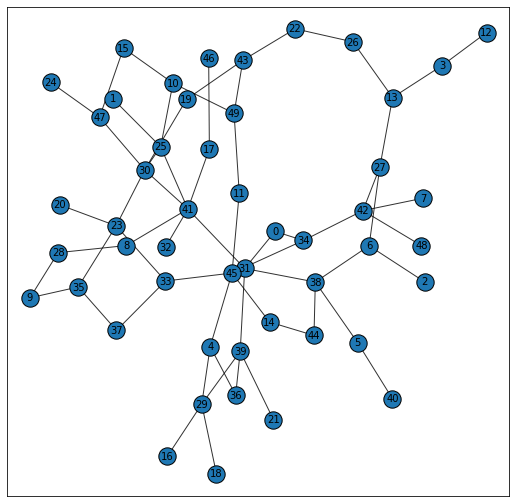

In [24]:
# Network Visualization
plt.figure(figsize=(9, 9))
pos = nx.kamada_kawai_layout(model)
nx.draw_networkx_nodes(model, pos, node_size=300, edgecolors = 'black')
nx.draw_networkx_edges(model, pos, alpha=0.8)
nx.draw_networkx_labels(model,pos = pos, font_size = 10)
plt.show()

### Hypothesis 1

In [25]:
S, frames = InformationSpreadModel(model, pos)

[11, 25, 3, 49, 34, 23, 48, 47, 46, 45]


In [26]:
gif.save(frames, "Images/Ernos_1_MaximazingInformationSpread_hyp1.gif", duration = len(frames), unit = "s", between='startend')

![](Images/Ernos_1_MaximazingInformationSpread_hyp1.gif)

### Hypothesis 2

In [27]:
S, frames = InformationSpreadModel_2(model, pos)

[49, 30, 0, 2, 33, 39, 23, 35, 22, 12]


In [28]:
S

[49, 30, 0, 2, 33, 39, 23, 35, 22, 12]

In [29]:
gif.save(frames, "Images/Ernos_1_MaximazingInformationSpread_hyp2.gif", duration = len(frames), unit = "s", between='startend')

![](Images/Ernos_1_MaximazingInformationSpread_hyp2.gif)

## Erdos Reyni, 150 nodes and p = 0.02

In [30]:
i = 0
while True:
    model = nx.generators.random_graphs.erdos_renyi_graph(n = 150, p = .02, seed = i)
    
    if nx.algorithms.components.is_connected(model):
        print(i)
        break
    i += 1

918


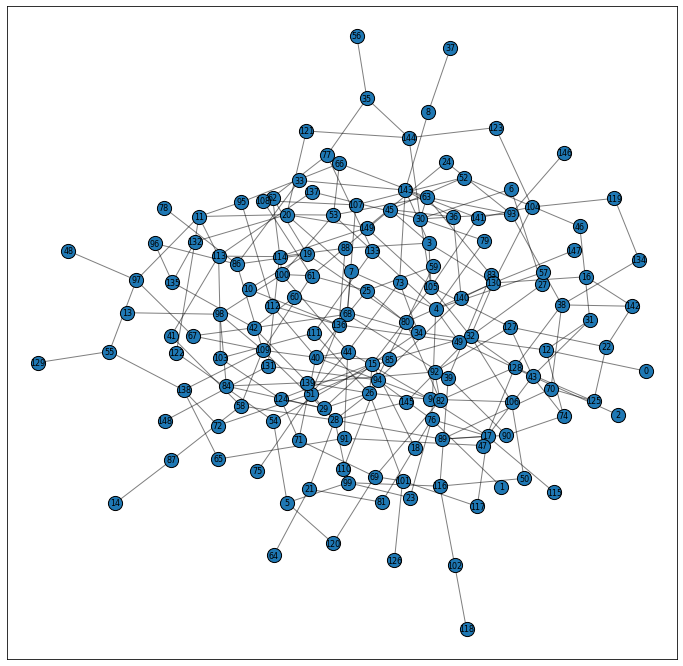

In [31]:
# Network Visualization
plt.figure(figsize=(12, 12))
pos = nx.kamada_kawai_layout(model)
nx.draw_networkx_nodes(model, pos, node_size=200, edgecolors = 'black')
nx.draw_networkx_edges(model, pos, alpha=0.5)
nx.draw_networkx_labels(model,pos = pos, font_size = 8)
plt.show()

### Hypothesis 1

In [32]:
S, frames = InformationSpreadModel(model, pos)

[149, 23, 33, 148, 122, 87, 5, 147, 146, 145]


In [33]:
gif.save(frames, "Images/Ernos_2_MaximazingInformationSpread_hyp1.gif", duration = len(frames), unit = "s", between='startend')

![](Images/Ernos_2_MaximazingInformationSpread_hyp1.gif)

### Hypothesis 2

In [34]:
S, frames = InformationSpreadModel_2(model, pos)

[149, 44, 148, 115, 36, 102, 103, 104, 88, 87]


In [35]:
S

[149, 44, 148, 115, 36, 102, 103, 104, 88, 87]

In [36]:
gif.save(frames, "Images/Ernos_2_MaximazingInformationSpread_hyp2.gif", duration = len(frames), unit = "s", between='startend')

![](Images/Ernos_2_MaximazingInformationSpread_hyp2.gif)

## Barabasi with 50 nodes and m = 2

In [37]:
i = 0
while True:
    model = nx.generators.random_graphs.barabasi_albert_graph(n = 50, m = 2, seed = i)
    
    if nx.algorithms.components.is_connected(model):
        print(i)
        break
    i += 1

0


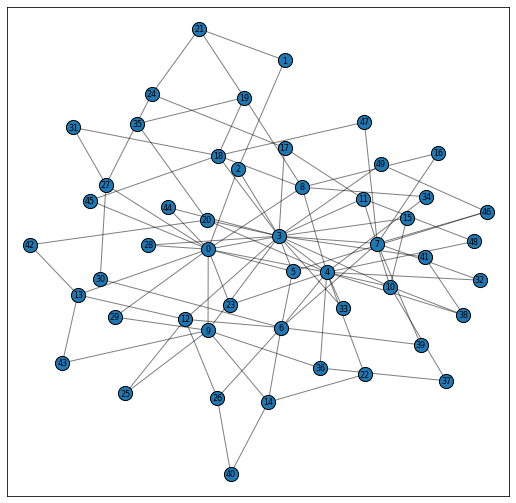

In [38]:
# Network Visualization
plt.figure(figsize=(9, 9))
pos = nx.kamada_kawai_layout(model)
nx.draw_networkx_nodes(model, pos, node_size=200, edgecolors = 'black')
nx.draw_networkx_edges(model, pos, alpha=0.5)
nx.draw_networkx_labels(model,pos = pos, font_size = 8)
plt.show()

### Hypothesis 1

In [39]:
S, frames = InformationSpreadModel(model, pos)

[49, 48, 47, 46, 45, 44, 43, 42, 41, 40]


In [40]:
gif.save(frames, "Images/Barabasi_1_MaximazingInformationSpread_hyp1.gif", duration = len(frames), unit = "s", between='startend')

![](Images/Barabasi_1_MaximazingInformationSpread_hyp1.gif)

### Hypothesis 2

In [41]:
S, frames = InformationSpreadModel_2(model, pos)

[10, 11, 49, 0, 1, 36, 27, 48, 47, 46]


In [42]:
gif.save(frames, "Images/Barabasi_1_MaximazingInformationSpread_hyp2.gif", duration = len(frames), unit = "s", between='startend')

![](Images/Barabasi_1_MaximazingInformationSpread_hyp2.gif)

## Barabasi with 150 nodes and m = 2

In [43]:
i = 0
while True:
    model = nx.generators.random_graphs.barabasi_albert_graph(n = 150, m = 2, seed = i)
    
    if nx.algorithms.components.is_connected(model):
        print(i)
        break
    i += 1

0


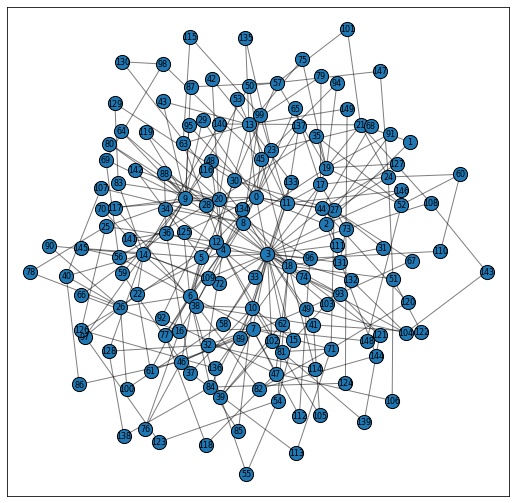

In [44]:
# Network Visualization
plt.figure(figsize=(9, 9))
pos = nx.kamada_kawai_layout(model)
nx.draw_networkx_nodes(model, pos, node_size=200, edgecolors = 'black')
nx.draw_networkx_edges(model, pos, alpha=0.5)
nx.draw_networkx_labels(model,pos = pos, font_size = 8)
plt.show()

## Hypothesis 1

In [45]:
S, frames = InformationSpreadModel(model, pos)

[149, 70, 108, 126, 104, 148, 147, 146, 145, 144]


In [46]:
gif.save(frames, "Images/Barabasi_2_MaximazingInformationSpread_hyp1.gif", duration = len(frames), unit = "s", between='startend')

![](Images/Barabasi_2_MaximazingInformationSpread_hyp1.gif)

### Hypothesis 2

In [47]:
S, frames = InformationSpreadModel_2(model, pos)

[110, 52, 43, 139, 92, 6, 0, 75, 45, 120]


In [48]:
gif.save(frames, "Images/Barabasi_2_MaximazingInformationSpread_hyp2.gif", duration = len(frames), unit = "s", between='startend')

![](Images/Barabasi_2_MaximazingInformationSpread_hyp2.gif)

## 6. Networks Avalanches

Generate a random network with the Erdős-Rényi G(N,p) model and a scale-free network with the configuration model, with $N = 10^3$ nodes and average degree $〈k〉 = 2$. Assume that on each node there is a bucket which can hold as many sand grains as the node degree. Simulate then the following process:

1. At each time step add a grain to a randomly chosen node i.
    
2. If the number of grains at node i reaches or exceeds its bucket size, then it becomes unstable and all the grains at the node topple to the buckets of its adjacent nodes.
    
3. If this toppling causes any of the adjacent nodes' buckets to be unstable, subsequent topplings follow on those nodes, until there is no unstable bucket left. We call this sequence of toppings an avalanche, its size $s$ being equal to the number of nodes that turned unstable following an initial perturbation (adding one grain).

Repeat (1)-(3) $10^4$ times. Assume that at each time step a fraction $10^{–4}$ of sand grains is lost in the transfer, so that the network buckets do not become saturated with sand. Study the avalanche distribution P(s).
    
**Suggested Reading**
* Barabasi. Network Science. Network Robustness ([Link](http://networksciencebook.com/chapter/8))

### Implementation notes:
For the implementation we considered that when a bucket topple also losses a fraction of sand grains and since a fraction $10^{-4}$ of $10^4$ is 1, whenever a overflow happens a grain is lost, for example; if the bucket (node) overflows with 8 grains only 7 are going to topple to adjacent nodes. We got to this conclusion because if there is no loss with overflow all the network would be fill with 2000 iterations or less (in the case of $〈k〉 = 2$), hence, only 4000 grains would be use in total, remaining 6000 grains, so the model would fail.

In [49]:
def initiate_buckets(G):
    """
    Function to initiate each node of the graph as a bucket
    
    return a diccionaty where the keys are the node names of the graph and all the values are 0
    """
    buckets = {key: 0 for key in G.nodes}
    
    return buckets


def topple(G, node, buckets):
    """
    Function to simulate the topple to adjacent nodes
    
    G: Graph
    node: node there the overflow happened
    buckets: dictionary containg the buckets with their number of grains in each one
    
    return the dictionary of buckets updated and how many grains where loss in the topples
    """
    #loss with the initial overflows
    loss = 1
    
    #eliminating the loss of the buckets
    buckets[node] -= 1
    
    #distributing the remainig grains to the adjacent nodes
    while buckets[node] > 0:
    
        for neigh_node in G.neighbors(node):

            buckets[neigh_node] += 1   

            buckets[node] -= 1
            
            if buckets[node] == 0:
                break
    
    #checking if a neighbor node became unstable
    for neigh_node in G.neighbors(node): 
        
        #condition to a node become unstable
        if buckets[neigh_node] >= G.degree[neigh_node]:
            #going recursively
            buckets, new_loss = topple(G, neigh_node, buckets)
            loss += new_loss
     
    return buckets, loss
    

def avalanche_model(G, iterations = 1E4, loss = 1E-4):
    """
    Function to simulate and avalanche model
    
    G: Graph
    iterations: number of iterations
    loss: how many grains are loss, basically the number of grains is iterations * loss
    
    return a dictionary with the number of grains per bucket
    """
    
    buckets = initiate_buckets(G)
    
    sand = iterations
    
    for i in range(int(iterations)):
    
        #getting where to put the grain
        random_node = np.random.choice(list(G.nodes), size = 1, replace = False)[0]

        buckets[random_node] += 1

        #condition to a node become unstable
        if buckets[random_node] >= G.degree[random_node]:
            
            buckets, sand_loss = topple(G, random_node, buckets)
            
            sand -= sand_loss
        
        sand -= iterations * loss
        
        if sand == 0:
            break
            
    return buckets

## Erdoes-Renyi

### Disclaimer:
We left running for more than 5 minutes and was impossible to find a connected random graph with $〈k〉 = 2$ since the p was to small (p = .002) and that was the necessary p, therefore, we did two implementations: one with a disconnected graph with the requeste average degree and one with a greater average degree

### Disclaimer 2:
Thanks to disclaimer 1, nodes with degree 1 when suffer an overflows does not transmit nodes because the topple cost 1 grain, therefore; it is consumed.

In [50]:

i = 0
while True:
    model = nx.generators.random_graphs.erdos_renyi_graph(n = 1000, p = 0.006, seed = i)
    
    if nx.algorithms.components.is_connected(model):
        print(i)
        break
    i += 1

80


In [51]:
values = [dgr[1] for dgr in model.degree()]
sum(values)/len(values)

6.148

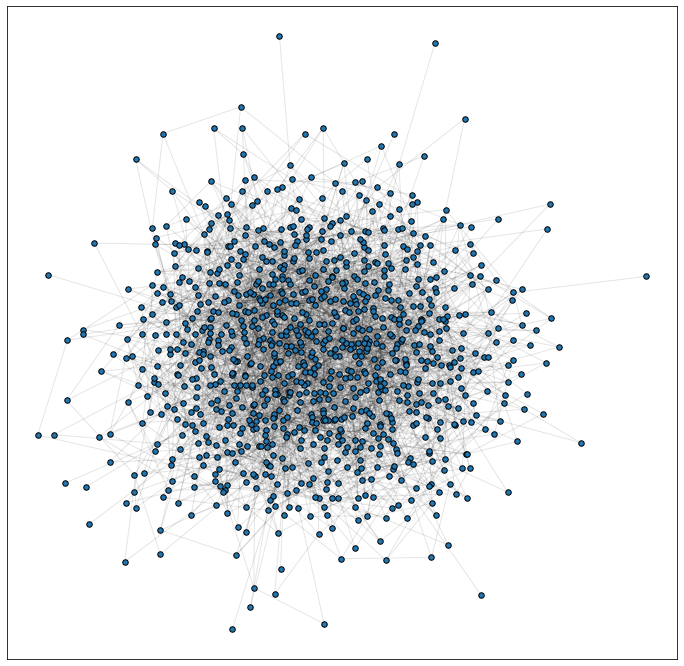

In [52]:
# Network Visualization
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(model)
nx.draw_networkx_nodes(model, pos, node_size=30, edgecolors = 'black')
nx.draw_networkx_edges(model, pos, alpha=0.1)
plt.show()

In [53]:
dic = avalanche_model(model)

In [54]:
print("Bucket \t grains")
for idx, i in enumerate(dic):
    print("{}: \t {}".format(i, dic[i]))
    
    if idx == 10:
        break

Bucket 	 grains
0: 	 4
1: 	 6
2: 	 1
3: 	 0
4: 	 6
5: 	 1
6: 	 0
7: 	 3
8: 	 5
9: 	 3
10: 	 4


In [55]:
model = nx.generators.random_graphs.erdos_renyi_graph(n = 1000, p = 0.002, seed = i)

In [56]:
values = [dgr[1] for dgr in model.degree()]
sum(values)/len(values)

2.01

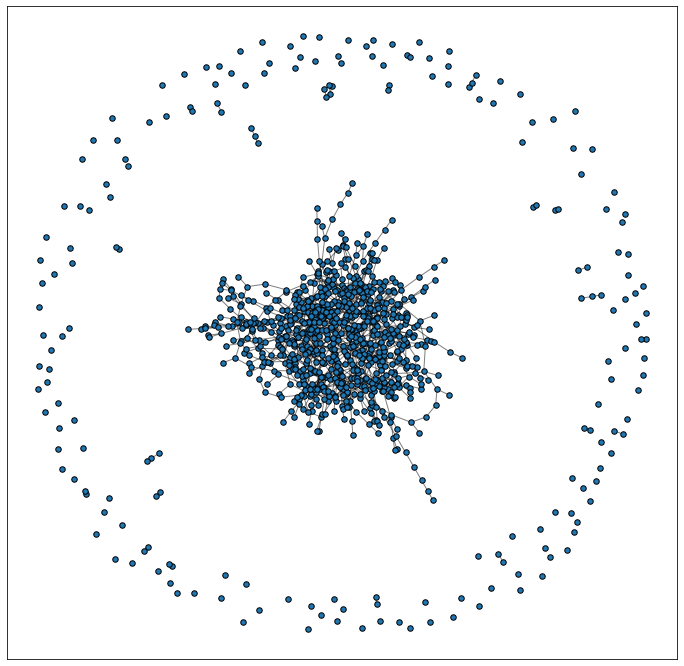

In [57]:
# Network Visualization
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(model)
nx.draw_networkx_nodes(model, pos, node_size=30, edgecolors = 'black')
nx.draw_networkx_edges(model, pos, alpha=0.5)
plt.show()

In [58]:
dic = avalanche_model(model)

In [59]:
print("Bucket \t grains")
for idx, i in enumerate(dic):
    print("{}: \t {}".format(i, dic[i]))
    
    if idx == 10:
        break

Bucket 	 grains
0: 	 0
1: 	 0
2: 	 0
3: 	 1
4: 	 0
5: 	 0
6: 	 2
7: 	 1
8: 	 1
9: 	 0
10: 	 1


## Scale-free network

In [60]:
i = 0
while True:
    model = nx.generators.random_graphs.barabasi_albert_graph(n = 1000, m = 1, seed = i)
    
    if nx.algorithms.components.is_connected(model):
        print(i)
        break
    i += 1

0


In [61]:
values = [dgr[1] for dgr in model.degree()]
sum(values)/len(values)

1.998

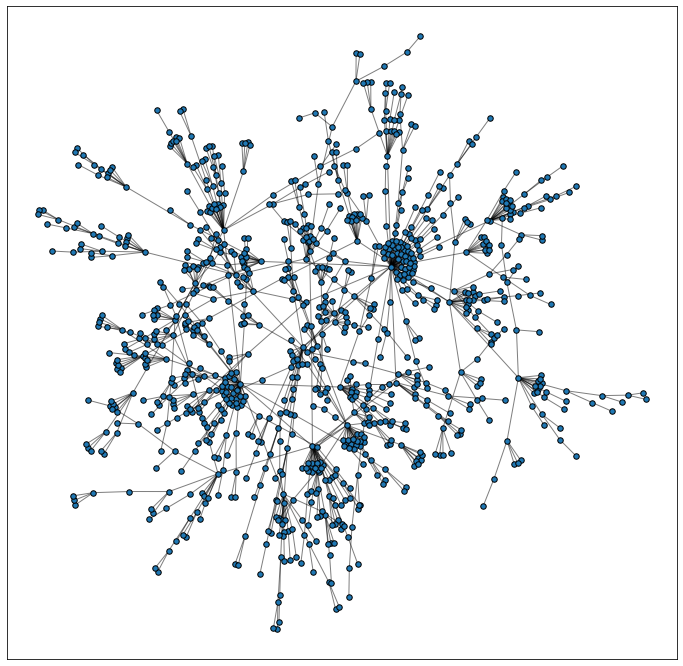

In [62]:
# Network Visualization
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(model)
nx.draw_networkx_nodes(model, pos, node_size=30, edgecolors = 'black')
nx.draw_networkx_edges(model, pos, alpha=0.5)
plt.show()

In [63]:
dic = avalanche_model(model)

In [64]:
print("Bucket \t grains")
for idx, i in enumerate(dic):
    print("{}: \t {}".format(i, dic[i]))
    
    if idx == 10:
        break

Bucket 	 grains
0: 	 73
1: 	 5
2: 	 15
3: 	 0
4: 	 5
5: 	 42
6: 	 12
7: 	 2
8: 	 4
9: 	 2
10: 	 4
